In [30]:
import numpy as np

def reg_model(beta, x):
    theta = np.array(beta, dtype=float)
    return theta[0]+theta[1]*x

def mse(beta, x, y):
    ypred = reg_model(beta,x)
    mean_squared_error = np.mean((ypred-y)**2)    
    return mean_squared_error    

def grad_mse(beta, x, y):
    ypred = reg_model(beta,x)
    grad = np.array([0,0],dtype=float)
    grad[0] = 2*np.mean(ypred-y)
    grad[1] = 2*np.mean((ypred-y)*x)
    return grad

def grad_descent(x, y, tol=1e-10, learn_rate=0.01, maxiter=400, thetaseed=[-10,20]):
    theta = np.array(thetaseed,dtype=float)
    cost = mse(theta, x, y)
    loss_fun_history = [cost.tolist()]
    theta_history = [theta.tolist()]
    for iterate in range(maxiter):        
        gradient_vector = grad_mse(theta,x,y)        # Cost Function Evaluation        
        theta-=learn_rate*gradient_vector            # Updating Scheme in Vector Form    
        cost_new = mse(theta,x,y)                    # Cost Function Revaluation
        DeltaJ = np.abs(cost_new-cost)
        #print(iterate," ",cost," (",theta[0],",",theta[1],")")
        if DeltaJ<tol:
            print("Convergence!")
            print(DeltaJ)
            break
        loss_fun_history.append(cost_new.tolist())
        theta_history.append(theta.tolist())
        cost = cost_new
    return theta, loss_fun_history, np.array(theta_history)

# 1. Testing Vanilla Descent Method
## 1.1 Simple Test \#1 
We consider first the simulated regression with one feature and bias term:
$$
y = \theta_0 + \theta_1 x + \sigma\epsilon \quad \epsilon\sim\mathcal{N}(0,1)
$$
with $\theta_0 = 2$, $\theta_1 = 5$ and $\sigma=0.18$. Therefore:

In [68]:
theta0 = 2.
theta1 = 5.
sigma = 1.
xsim = np.random.randn(100,1)
noise = sigma*np.random.randn(100,1)
ysim = theta0 + theta1*xsim+noise

In [61]:
print(xsim.shape, ysim.shape)

(100, 1) (100, 1)


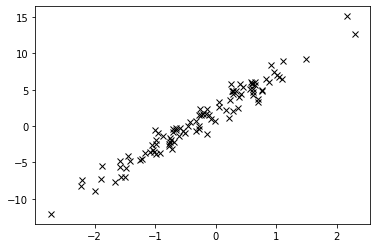

In [62]:
import matplotlib.pyplot as plt
plt.plot(xsim,ysim,'kx')

In [63]:
theta_gd, cost_hist, theta_hist = grad_descent(xsim, ysim)

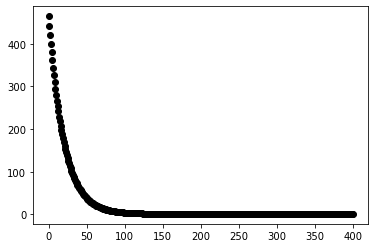

In [64]:
plt.plot(cost_hist,'ko')

In [65]:
print(theta_gd)

[2.14461254 5.01355236]


## 1.2 Using `make_regression` from `sklearn`: Test \#2

`make_regression` from `sklearn` is capable to generate simulated data from a linear regression by specifying the number $n$ of features (i.e. the \# explanatory variables with coefficients $\theta_1,\dots,\theta_n$), the bias $\theta_0$ and the number of points (observations to be simulated).

In [37]:
from sklearn.datasets import make_regression
xobs, yobs, coef = make_regression(n_features=1,
                                  n_informative=1,
                                  bias=10,
                                  noise=5,
                                  coef=True)
print(xobs.shape, yobs.shape)

(100, 1) (100,)


In [38]:
print(coef)

9.864458110656694


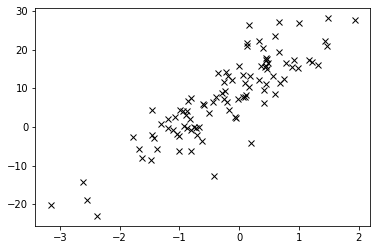

In [42]:
plt.plot(xobs,yobs,'kx')

Then, the regression model generated by `make_regression` can be written as:
$$
y_o = \theta_0 + \theta_1 x_o + \sigma\epsilon\quad \epsilon\sim\mathcal{N}(0,1)
$$
with $\theta_0 = 10$, $\theta_1\approx 9.864$ and $\sigma=5$.

In [39]:
yobs = np.array([yobs]).T

[9.91022013 9.72771523]


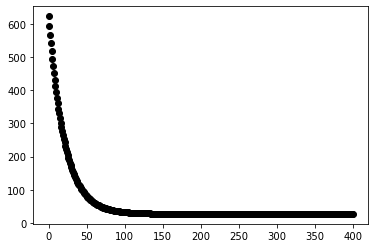

In [41]:
theta_gd, loss_fun, theta_list = grad_descent(xobs, yobs)
plt.plot(loss_fun,'ko')
print(theta_gd)

# 2. Comparing With Normal Equations

_Normal Equations_ are equivalent to the First Order Conditions for the Gradient, ie.
$$
X^T X \boldsymbol{\theta} = X^T \mathbf{y}
$$

Provided that the matrix $X^T X$ is invertible, we can express the former relation as:
$$
\boldsymbol{\theta} = (X^T X)^{-1} X^T \mathbf{y} = X^+ \mathbf{y}
$$
where we have introduced the pseudo-inverse matrix of $X$ (aka Moore-Penrose inverse).

The package `numpy.linalg` contains the implementation `pinv` for the calculation of this matrix.

In [74]:
def linreg_normal_eqs(x, y):
    X = np.concatenate((np.ones(xobs.shape),xobs),axis=1) # Concatenating Constant Feature
    theta = np.linalg.pinv(X)@y
    return theta

## Test \#2

In [75]:
theta2_by_normaleqs = linreg_normal_eqs(xobs, yobs)

In [73]:
print(theta2_by_normaleqs)

[[9.92136196]
 [9.73830225]]


In [77]:
theta, *_ = grad_descent(xobs, yobs)

In [78]:
print(theta)

[9.91022013 9.72771523]
